In [2]:
import datetime

import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin

yfin.pdr_override()

# Diversification

In [3]:
# start = datetime.date.today()-datetime.timedelta(365*10)
# end = datetime.date.today()
start = datetime.date(2016, 11, 29)
end = datetime.date(2021, 11, 28)

prices = web.DataReader(["JPM", "BTC-USD"], start, end)["Adj Close"]
prices = prices.rename(columns={"BTC-USD": "BTC"})
prices = prices.dropna()
returns = prices.pct_change()

[*********************100%***********************]  2 of 2 completed


In [4]:
# observe data
returns.head()

,BTC,JPM
Date,,
2016-11-29,NaN,NaN
2016-11-30,0.013713,0.015839
2016-12-01,0.014863,0.020207
2016-12-02,0.027974,-0.002323
2016-12-05,-0.024737,0.020343


## 1.1 Determine Initial Investment

In [5]:
# Determine weights
initialJPM = prices.JPM[0] * 100
initialBTC = prices.BTC[0] * 5
initialInvestment = initialJPM + initialBTC

In [6]:
weightJPM = initialJPM / (initialBTC + initialJPM)
weightBTC = 1 - weightJPM
print(
    "This would make the weights %.3f and %.3f for JPM and BTC respectively"
    % (weightJPM, weightBTC)
)

This would make the weights 0.641 and 0.359 for JPM and BTC respectively


## 1.2 Calculate Portfolio Daily Returns

In [7]:
returns["Portfolio"] = (returns.JPM * weightJPM) + (returns.BTC * weightBTC)
returns = returns + 1
returns.head()

,BTC,JPM,Portfolio
Date,,,
2016-11-29,NaN,NaN,NaN
2016-11-30,1.013713,1.015839,1.015076
2016-12-01,1.014863,1.020207,1.018290
2016-12-02,1.027974,0.997677,1.008546
2016-12-05,0.975263,1.020343,1.004170


In [8]:
returns.iloc[0] = 10000
returns.head()

,BTC,JPM,Portfolio
Date,,,
2016-11-29,10000.000000,10000.000000,10000.000000
2016-11-30,1.013713,1.015839,1.015076
2016-12-01,1.014863,1.020207,1.018290
2016-12-02,1.027974,0.997677,1.008546
2016-12-05,0.975263,1.020343,1.004170


In [9]:
returns.cumprod()

,BTC,JPM,Portfolio
Date,,,
2016-11-29,10000.000000,10000.000000,10000.000000
2016-11-30,10137.125071,10158.389380,10150.760802
2016-12-01,10287.790480,10363.662527,10336.417261
2016-12-02,10575.580959,10339.587017,10424.752365
2016-12-05,10313.973390,10549.922218,10468.227416
...,...,...,...
2021-11-19,790093.281390,23370.826808,119461.205294
2021-11-22,765211.836309,23868.971476,119744.379261
2021-11-23,782609.582235,24439.737242,122557.216789


In [10]:
portValues = returns.cumprod()
portValues["Date"] = portValues.index

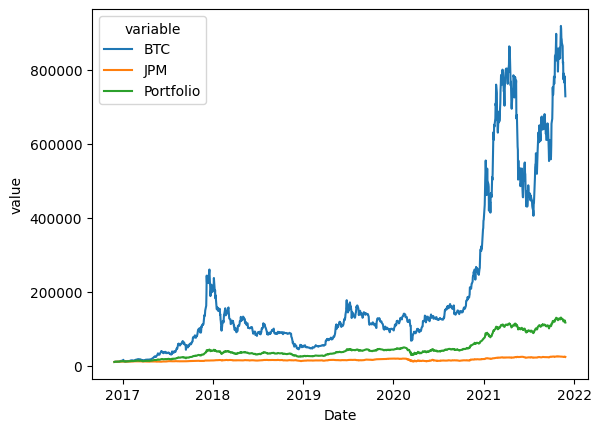

In [11]:
sns.lineplot(
    x="Date", y="value", hue="variable", data=portValues.melt(id_vars=["Date"])
);